# How do machines understand opinion, a Machine Learning approach.
## by Fabian Reich

This NoteBook is based on this medium article: https://medium.com/@vasista/sentiment-analysis-using-svm-338d418e3ff1 by Vasista Reddy. The code can be found here: https://github.com/Vasistareddy/sentiment_analysis

## Problem Statment
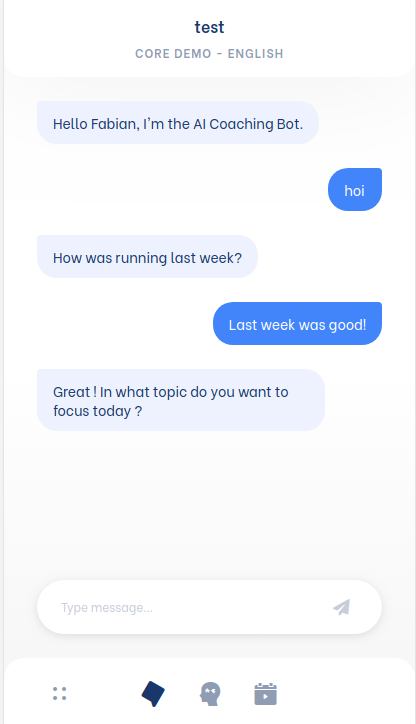

In [22]:
from pandas import DataFrame
documents = [["Last week was great","pos"],
             ["I had a horrible week","neg"],
            ["I was feeling good!", "pos"]]

newSentence = "Last week was good!"

trainData = DataFrame(documents, columns=["Content", "Label"])

## Find a good data representation

![title](img/representation2.png)


Expelation of the basic representations: https://www.youtube.com/watch?v=WN18JksF9Cg

In [23]:
from pandas import DataFrame


def visulize(message_list, vectorizer):
    doc_term_matrix = vectorizer.fit_transform(message_list)
    return DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names())

## Count Vectorize

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

print("Data Set: ", documents)

visulize(trainData["Content"], count_vec)

('Data Set: ', [['Last week was great', 'pos'], ['I had a horrible week', 'neg'], ['I was feeling good!', 'pos']])


,feeling,good,great,had,horrible,last,was,week
0,0,0,1,0,0,1,1,1
1,0,0,0,1,1,0,0,1
2,1,1,0,0,0,0,1,0


# The classifier
Tutorial: https://www.youtube.com/watch?v=CPqOCI0ahss

- Dog barks
- Cat meows

## Naive Bayse

In [25]:
import numpy as np
def visulize_NB(message_list, vectorizer, labels):
    doc_term_matrix = vectorizer.fit_transform(message_list)
    
    arrayLabels = []
    for label in labels.to_numpy():
        arrayLabels.append([label])
    
    doc_term_array = np.append(doc_term_matrix.toarray(), arrayLabels, axis=1)
    columns = vectorizer.get_feature_names() + list([u'sentiment'])
    
    
    return DataFrame(doc_term_array, columns=columns)

### Naive Bayse

In [26]:
print("Data Set: ", documents)

count_vec = CountVectorizer()
exampleTrainVectors = count_vec.fit_transform(trainData['Content'])
visulize_NB(trainData["Content"], count_vec, trainData["Label"])

('Data Set: ', [['Last week was great', 'pos'], ['I had a horrible week', 'neg'], ['I was feeling good!', 'pos']])


,feeling,good,great,had,horrible,last,was,week,sentiment
0,0,0,1,0,0,1,1,1,pos
1,0,0,0,1,1,0,0,1,neg
2,1,1,0,0,0,0,1,0,pos


### 1. Generate General Probabilities

P(pos) = 2/3

P(neg) = 1/3

### 2. Calculate the conditional Probabilities

E.g. P(feeling=1|pos) = 1/2

Also

- P(feeling=0|pos)
- P(feeling=1|pos)
- P(feeling=0|neg)
- P(feeling=1|neg)
- ...

In [27]:
visulize_NB(trainData["Content"], count_vec, trainData["Label"])

,feeling,good,great,had,horrible,last,was,week,sentiment
0,0,0,1,0,0,1,1,1,pos
1,0,0,0,1,1,0,0,1,neg
2,1,1,0,0,0,0,1,0,pos


In [28]:
from sklearn import naive_bayes

clf = naive_bayes.MultinomialNB()
clf.fit(exampleTrainVectors, trainData['Label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Classify new Sentence: Last week was good!

#### Words that are present:

P(was=1 | pos) * 
P(good=1 | pos) * 
P(last=1 | pos) * 
P(week=1 | pos) * 

#### Words that are NOT present:
P(great=0| pos) *
P(feeling=0 | pos) * 
P(had=0 | pos) * 
P(horrible=0 | pos) * 
P(pos)

#### Devide by evidence of this sentence:

P(X) = P(feeling=0)* P(good=1) * P(great=0) * P(had=0) * P(horrible=0) * P(last=0) * P(was=1) * P(week=1)


pos = 0.87406998

#### Condition neg:

neg = 0.12593002

#### Predict class:

pos > neg

0.87406998 > 0.12593002

In [31]:
testVector = count_vec.transform([newSentence])

print(clf.predict(testVector))

['pos']


## Fuck-Ups
### 1. Size of input:

User: "I would like to further educate myself in online marketing.  I would like to expand my contact points - I think that there is a lot of potential in online marketing. We already use Facebook and Google Adwords as well as our own website. With the coaching I would like to improve our findability on the Internet as well as increase online transactions."

Bot: "Sorry, I didn't understand you. Please contact fr@coach-bot.de"

# Improvments:
1. Better Representation
2. Bigger training data set
3. Preprocessing: Stopword Removal, Stemming
4. Different Algorithms

https://www.linkedin.com/in/fabianreich/

## More Advances Approche:
1. More Data
2. TF-IDF
3. Naive Baise or SVM

In [2]:
import pandas

# train Data
trainData = pandas.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/train.csv")
# test Data
testData = pandas.read_csv("https://raw.githubusercontent.com/Vasistareddy/sentiment_analysis/master/data/test.csv")

print(testData)

                                               Content Label
0    hedwig ( john cameron mitchell ) was born a bo...   pos
1    one of the more unusual and suggestively viole...   pos
2    what do you get when you combine clueless and ...   pos
3    >from the man who presented us with henry : th...   pos
4    tibet has entered the american consciousness s...   pos
5    niagara niagara ( r ) bob gosse's niagara niag...   pos
6    few films in 1999 have divided the critical co...   pos
7    before you read my review , you gotta know tha...   pos
8    the most amazing thing about paul cox's innoce...   pos
9    when i initially set out to review this film ,...   pos
10   martin scorsese's films used to intimidate me ...   pos
11   ingredients : james bond , scuba scene , car c...   pos
12   a thriller set in modern day seattle , that ma...   pos
13   let's say you live at the end of an airport ru...   pos
14   the idea at the center of the devil's advocate...   pos
15   gere , willis , poi

## TF-IDF Vectorize
term frequency: How often does a word occure in one document?

inverse document frequency: How comman is a word accross all documents?

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer()

documents = ["Last week was great",
             "I had a horrible week",
            "I was feeling good!"]

visulize(documents, tfidfVectorizer)

,feeling,good,great,had,horrible,last,was,week
0,0.000000,0.000000,0.562829,0.000000,0.000000,0.562829,0.428046,0.428046
1,0.000000,0.000000,0.000000,0.622766,0.622766,0.000000,0.000000,0.473630
2,0.622766,0.622766,0.000000,0.000000,0.000000,0.000000,0.473630,0.000000


### TF-IDF vs Count

E.g. for the sentence "The house is green"

What are the words that carry most meeing?

- "The house"
- "house is"
- ...
- "The is"
- "house green"

In [14]:
# min_df: Cut-off, ignore terms that have a frequency of less then this value (here 5).
# max_df: Ignore terms that have a higher document frequency then x% (here 80%)
tfidfVectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)


train_vectors = tfidfVectorizer.fit_transform(trainData['Content'])
test_vectors = tfidfVectorizer.transform(testData['Content'])

In [9]:
import time
from sklearn import naive_bayes
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
clf = naive_bayes.MultinomialNB()
t0 = time.time()
clf.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = clf.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Training time: 0.023829s; Prediction time: 0.000913s
('positive: ', {'recall': 0.78, 'f1-score': 0.8387096774193548, 'support': 100, 'precision': 0.9069767441860465})
('negative: ', {'recall': 0.92, 'f1-score': 0.8598130841121495, 'support': 100, 'precision': 0.8070175438596491})


### SVM
Great tutorial under: https://www.youtube.com/watch?v=efR1C6CvhmE

In [8]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Label'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('positive: ', report['pos'])
print('negative: ', report['neg'])

Training time: 7.233022s; Prediction time: 0.825205s
('positive: ', {'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100, 'precision': 0.9191919191919192})
('negative: ', {'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100, 'precision': 0.9108910891089109})


In [11]:
review = """I HATE THIS PHONE"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['neg']


In [18]:
review = """Ohh it was not great!"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['pos']


# Future Reading:

- Deep Learning Book: https://bit.ly/351qMzb
- Free code camp curated list: https://bit.ly/3erZEN4
- A Code-First Introduction to Natural Language Processing: https://bit.ly/3esFtP8
- Stanford resources on Natural Language Processing: https://lnkd.in/er9BbTB & https://lnkd.in/eRKm8Dj
- Primer on neural network models: https://bit.ly/3eth9Ni
- Gradient-based optimisation blog: https://bit.ly/2ZI3Fck
- NLP-progress: https://bit.ly/3gvh1i3

by Sebastian Ruder